In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [23]:
base_url = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l2632&_nkw=macbook+pro&_sacat=175672&_odkw=samsung+smart+++tv&_osacat=0"
n = range(1,4)
for num in n:
    url =f'{base_url}{num}'
    response =  requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    product_a = []


    products = soup.find_all( 'li', {'class': 's-item s-item__pl-on-bottom'})
    for product in products:
        name = product.find("span", {'role': 'heading'})
        f_name =name.text.strip()
        if f_name =="Shop on eBay":
            continue
        

        price = product.find("span", {'class': 's-item__price'})
        unfiltered = price.text.strip()
        match = re.search(r'(\d+\.\d+)', unfiltered)
        if match:
            f_match = match.group(1) if match else 0.0
        
        rating = product.find("span",{"class": 's-item__seller-info-text'})
        f_rating = "N/A"
        if rating:
            unf_rating =rating.text.strip()
            r_match = re.search(r'(\d+(\.\d+)?)%', unf_rating)
            f_rating = r_match.group(1)
        img = product.find('img')
        if img:
            image = img.get('src')
        
        product_a.append({"name":f_name,
                "price(USD)": f_match,
                "rating": f_rating,
                "image": image})


In [24]:
dat = pd.DataFrame(data= product_a)
dat.to_csv("Items.csv")

In [25]:
dat.to_excel("Items.xlsx")

In [26]:
dat['price(USD)'] = pd.to_numeric(dat['price(USD)'], errors='coerce').round(2)
dat['price(NGN)'] = (dat['price(USD)'] * 1488).round(0).astype(int)

pd.set_option('display.float_format', '{:.2f}'.format)

dat.to_csv('Items.csv', index=False)
dat.to_excel('products.xlsx', index=False)
dat

,name,price(USD),rating,image,price(NGN)
0,2024 SONOMA OSX - 2020 MACBOOK PRO 13 - 2.0GHz...,579.99,98.7,https://i.ebayimg.com/thumbs/images/g/mosAAOSw...,863025
1,Apple 2020 MacBook Pro 13 in 2.0GHz Quad-Core ...,549.99,100,https://i.ebayimg.com/thumbs/images/g/4R4AAOSw...,818385
2,"Apple Macbook Pro 2016 15"""" Touch Bar + Intel ...",301.01,100,https://i.ebayimg.com/thumbs/images/g/ubcAAOSw...,447903
3,"New ListingApple MacBook Pro 13.3"" SSD, M2, 8...",680.00,0,https://i.ebayimg.com/thumbs/images/g/bJgAAOSw...,1011840
4,"Apple Macbook Pro Mid 2018 Touchbar 13"" A1989 ...",379.00,99.4,https://i.ebayimg.com/thumbs/images/g/N-IAAOSw...,563952
...,...,...,...,...,...
70,"MacBook Pro 13"" Space Gray Late 2016 2.4 GHz I...",199.99,98.8,https://i.ebayimg.com/thumbs/images/g/jjgAAOSw...,297585
71,Apple MacBook Pro 2020 A2338 13in M1 8 Core 8G...,594.95,98.3,https://i.ebayimg.com/thumbs/images/g/o~MAAOSw...,885286
72,Apple MacBook Pro 2020 A2338 13in M1 8 Core 16...,824.95,98.3,https://i.ebayimg.com/thumbs/images/g/KZEAAOSw...,1227526
73,"New Listing2018 Apple MacBook Pro A1990 15"" i7...",429.29,97.3,https://i.ebayimg.com/thumbs/images/g/jSkAAOSw...,638784


<Axes: xlabel='price(NGN)'>

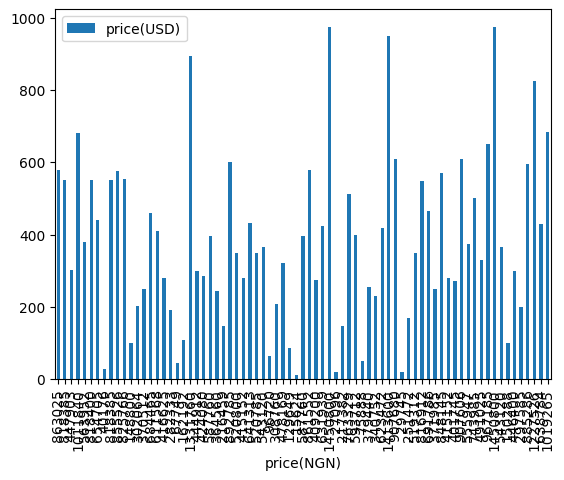

In [27]:
dat.plot.bar(x='price(NGN)', y='price(USD)')

In [28]:
average_usd = dat['price(USD)'].mean()
average_ngn = dat['price(NGN)'].mean()

print(f"The average price in USD is ${average_usd.round(1)}")
print(f'The average price in naira #{average_ngn.round(1)}')

The average price in USD is $382.2
The average price in naira #568685.8


<Axes: xlabel='rating'>

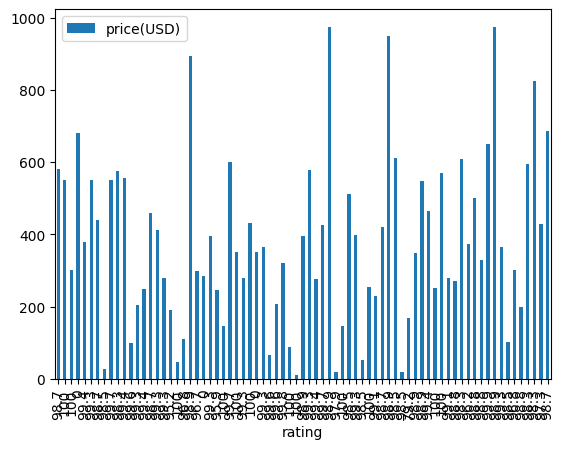

In [30]:
dat.plot.bar(x='rating', y='price(USD)')

In [31]:
dat['rating'].describe()

count      75
unique     22
top       100
freq       12
Name: rating, dtype: object

<Axes: xlabel='rating'>

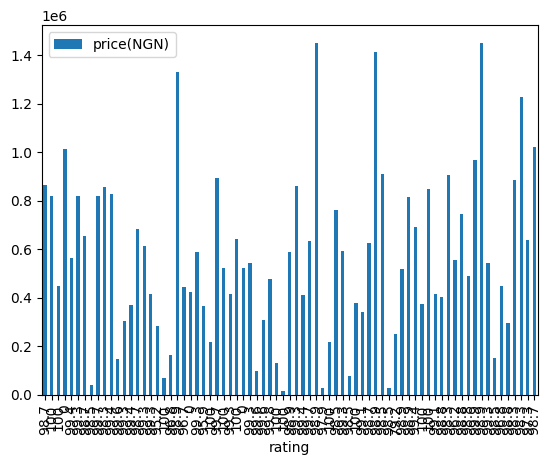

In [32]:
dat.plot.bar(x='rating', y='price(NGN)')

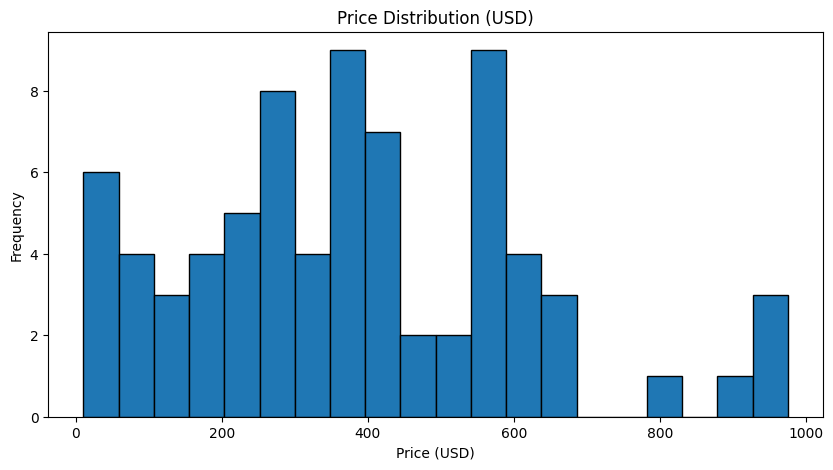

In [34]:
plt.figure(figsize=(10, 5))
dat['price(USD)'].hist(bins=20, edgecolor='black')
plt.title('Price Distribution (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()



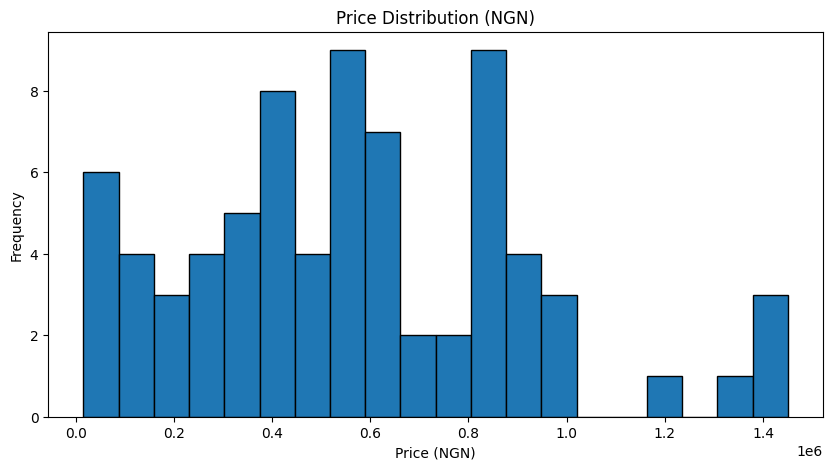

In [35]:
plt.figure(figsize=(10, 5))
dat['price(NGN)'].hist(bins=20, edgecolor='black')
plt.title('Price Distribution (NGN)')
plt.xlabel('Price (NGN)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

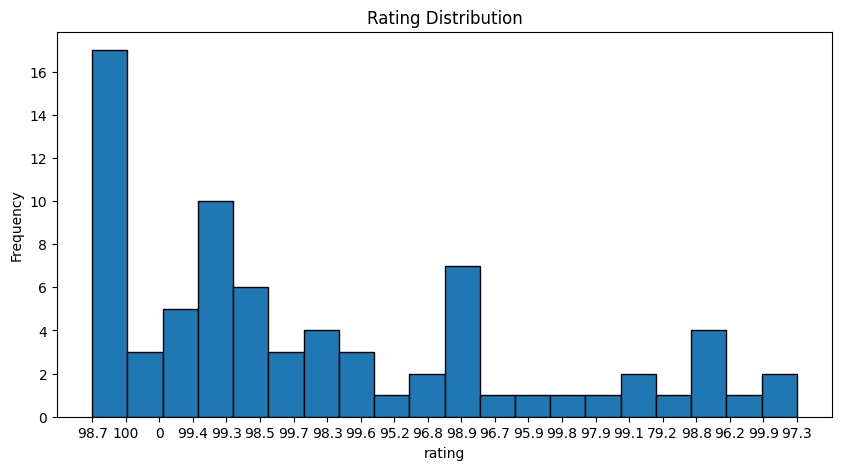

In [36]:
plt.figure(figsize=(10, 5))
dat['rating'].hist(bins=20, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()